Now it's your turn to do the work! I have prepared a dataset for you: `DataGame.csv`. You will find it on OLAT.

### Exercise 1

Unfortunately, the lazy data preparator has forgotten to provide you the *metadata* of this file (this happens more often then you think). The only thing you now is that the station is located at [30.47153N, 90.64534E], which is on the Zhadang glacier in Tibet.

**Do you know what "metadata" means? If not, use your favorite search engine and have a quick look!**

**Read the data with pandas and "explore" the dataframe. How long are the time series? Which temporal resolution? Try to find out which variable is which. Once you got them all, rename the columns accordingly.**

**While doing this exercise, I recommend to explore the data methodically. Describe the annual cycle, the range, possibly the diurnal cycle, and find out the units of each variable. Discuss this with your neighbors!**

In [1]:
# imports and defaults
import pandas as pd  
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows = 14
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

In [2]:
# read the data
df = pd.read_csv('DataGame.csv', index_col=0, parse_dates=True)

In [3]:
# plot all vars
for c in df.columns:
    # empty figure and plot
    plt.figure(figsize=(6, 4))
    df[c].plot(title=c)
    plt.tight_layout()
    plt.savefig(c + '.png', dpi=300)
    plt.close()

In [ ]:
# alternative multiplot
plt.figure(figsize= (5,20))
VAR = dg.columns
for v, var in enumerate(VAR, 1):
        plt.subplot(len(VAR), 1, v)
        dg[var].plot()

In [4]:
# rename the columns
df.columns = ['PRESSURE', 'ANGLE', 'WINDSPEED', 'NETRAD', 'RH', 'SWIN', 'SR50', 'TEMP', 'SWOUT', 'WINDDIR', 'SURFTEMP']

### Exercise 2

Now that you've got all this sorted out, take the incoming shortwave radiation variable. Plot one summer day of data (any summer day). If it's not a clear sky day, pick another day with clear sky conditions.

**Discuss the daily cycle of radiation. Does it make sense? What is the probable time zone of the data? By how many hours should you shift the data?**

Once you have an idea, check if this corresponds to the actual solar time at this location, for example by using an online solar time calculator: http://www.esrl.noaa.gov/gmd/grad/solcalc/. Compare this time with the China Standard Time (CST).

**Redefine the index with a new time shifted with the right number of hours, so that the solar noon matches the data (approximately).**

*Note: this new time is called "solar time", while the China Standard Time is the "local time".* 

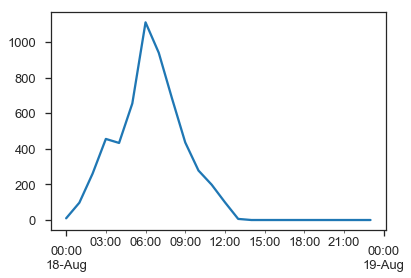

In [5]:
# any day
df['SWIN'].loc['2011-08-18'].plot();

In [6]:
# approx 6 hours, confirmed by the webpage
df.index = df.index + pd.DateOffset(hours=6)

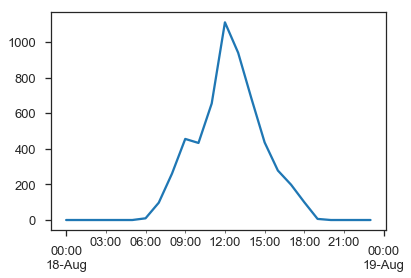

In [7]:
# check if its better
df['SWIN'].loc['2011-08-18'].plot();

### Exercise 3

We now have plenty of data at hand. Let's focus on one of the most complicated variable first: wind. The wind direction is given with an angle value, which reports the direction **from where the wind is blowing**:
- North: 0°
- South: 180°
- West: 270°
- East: 90°

For example, if the wind direction is 45 degrees, the winds are coming out of the northeast and blowing towards the southwest. This would be called a north-easterly wind.

**Discuss the possible implications that a naive averaging of the wind direction would have. Does it actually make sense to plot the wind direction as a line? Plot the wind-direction as an histogram. Choose the number of bins so that the size of a bin is 10°.**

By entering the coordinates of the station in http://www.bing.com/maps/ you can have a look at the geographical situation of the glacier. Analyse the *dominant* wind directions in this context. From which directions does the wind almost *never* blow?

**Plot the wind speed and direction as a scatter plot, with the wind-direction as x-axis and the wind-speed as y-axis.**

From which direction are the strongest winds coming from? Using your knowledge from the Climate lecture, try to provide an explanation for this preferred wind direction.

**Now reproduce the scatter plot from above, but once with data from August only, and once with data from January only. Discuss.**

**Bonus: plot the average diurnal cycle of wind speed in August, and in January.**

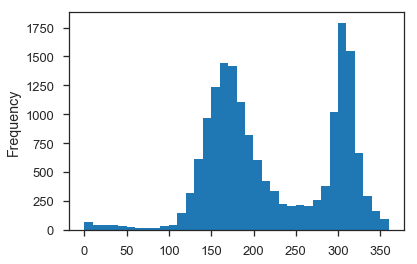

In [8]:
# histogram plot
df['WINDDIR'].plot(kind='hist', bins=36);

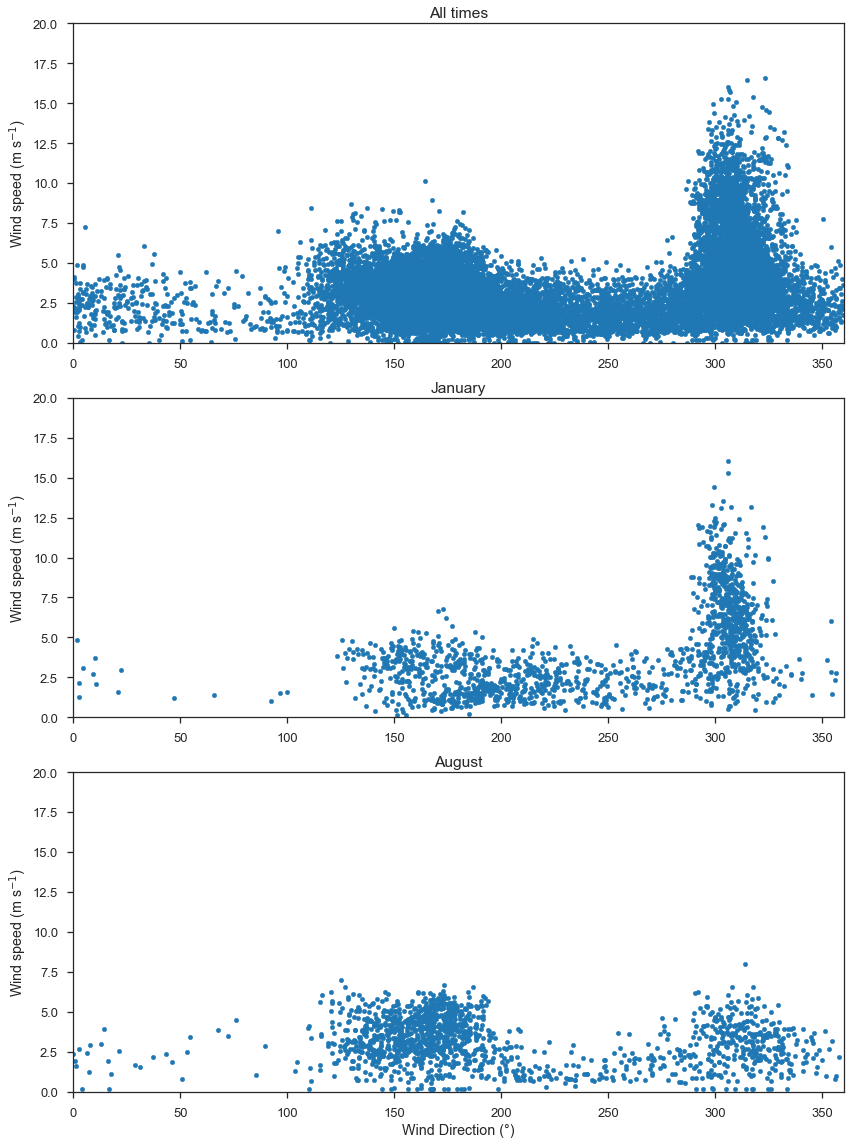

In [9]:
# scatter plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 16))
df.plot(kind='scatter', x='WINDDIR', y='WINDSPEED', title='All times', ax=ax1);
ax1.set_ylim([0, 20]);
ax1.set_xlim([0, 360]);
ax1.set_xlabel('');
ax1.set_ylabel('Wind speed (m s$^{-1}$)');
df.loc[df.index.month == 1].plot(kind='scatter', x='WINDDIR', y='WINDSPEED', title='January', ax=ax2);
ax2.set_ylim([0, 20]);
ax2.set_xlim([0, 360]);
ax2.set_xlabel('');
ax2.set_ylabel('Wind speed (m s$^{-1}$)');
df.loc[df.index.month == 8].plot(kind='scatter', x='WINDDIR', y='WINDSPEED', title='August', ax=ax3);
ax3.set_ylim([0, 20]);
ax3.set_xlim([0, 360]);
ax3.set_xlabel('Wind Direction (°)');
ax3.set_ylabel('Wind speed (m s$^{-1}$)');
plt.tight_layout()

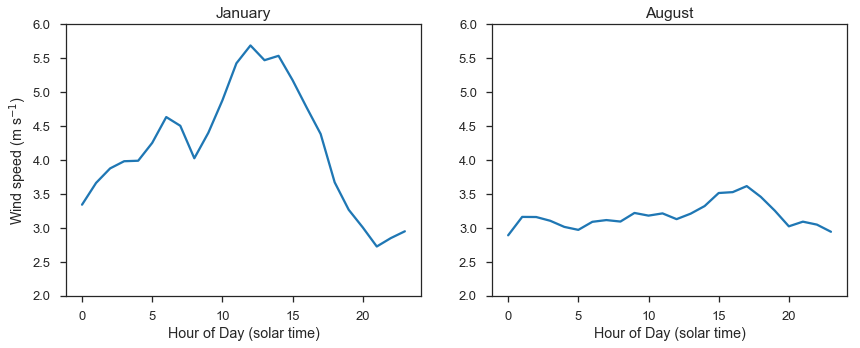

In [10]:
# Daily cycle
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
dfsel = df['WINDSPEED'].loc[df.index.month == 1]
dfsel.groupby(dfsel.index.hour).mean().plot(ax=ax1, title='January');
ax1.set_ylim([2, 6]);
ax1.set_ylabel('Wind speed (m s$^{-1}$)')
ax1.set_xlabel('Hour of Day (solar time)')
dfsel = df['WINDSPEED'].loc[df.index.month == 8]
dfsel.groupby(dfsel.index.hour).mean().plot(ax=ax2, title='August');
ax2.set_ylim([2, 6]);
ax2.set_xlabel('Hour of Day (solar time)');

### Exercise 4

One of the oldest (and still widely used) model of ice and snow melt is the [degree day model](http://www.antarcticglaciers.org/glaciers-and-climate/numerical-ice-sheet-models/modelling-glacier-melt/). It relies on the assumption that melt occurs when air temperature is above the melting point.

**Compute the daily averages of air temperature and select the days with temperature above zero. When do they occur? Count the number of days with average temperature above zero. Discuss.**

In [11]:
# Averages
dailytemp = df['TEMP'].resample('D').mean()

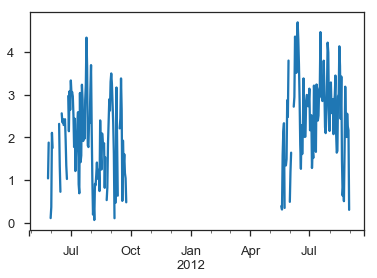

In [14]:
# For the plot its better to crop than select 
dailytemp.loc[dailytemp < 0] = np.NaN
dailytemp.plot();

In [13]:
# count
ndays = len(dailytemp.loc[dailytemp > 0])
totdays = len(dailytemp)
print('{} days out of {} have a daily average above 0°C'.format(ndays, totdays))

208 days out of 702 have a daily average above 0°C


### Bonus exercises

Plot whatever you want to plot, and analyse whatever you want to analyse. This is very unique data, so use it!